## Load Data from CSVs

In [ ]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [ ]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

daily_engagement = 
project_submissions = 

## Fixing Data Types

In [1]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

NameError: name 'enrollments' is not defined

In [ ]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

In [ ]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

## Investigating the Data

In [ ]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

## Problems in the Data

In [ ]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

## Missing Engagement Records

In [ ]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

## Checking for More Problem Records

In [ ]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

## Tracking Down the Remaining Problems

In [ ]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

In [ ]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [ ]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

## Refining the Question

In [ ]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students =

## Getting Data from First Week

In [ ]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7

In [ ]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = 

## Exploring Student Engagement

In [ ]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [ ]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [ ]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

## Debugging Data Analysis Code

In [ ]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

## Lessons Completed in First Week

In [ ]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

## Number of Visits in First Week

In [ ]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

## Splitting out Passing Students

In [ ]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passing_engagement =
non_passing_engagement =

## Comparing the Two Student Groups

In [ ]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).



## Making Histograms

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


(array([ 384.,  132.,   65.,   32.,    8.,   15.,    2.,    2.,    2.,
           1.,    1.,    2.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.]),
 array([  0. ,   1.8,   3.6,   5.4,   7.2,   9. ,  10.8,  12.6,  14.4,
         16.2,  18. ,  19.8,  21.6,  23.4,  25.2,  27. ,  28.8,  30.6,
         32.4,  34.2,  36. ]),
 <a list of 20 Patch objects>)

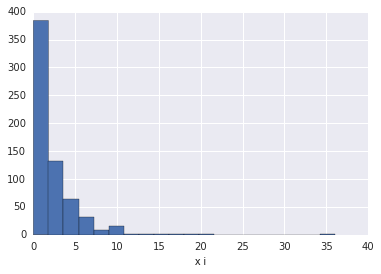

In [9]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

import unicodecsv
from datetime import datetime as dt
from collections import defaultdict
import numpy as np

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

with open('daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)

with open('project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)

def parse_date(date):
    if date == '':
        return None
    else:
    	return dt.strptime(date, '%Y-%m-%d')

def parse_maybe_int(i):
    if i == '':
    	return None
    else:
    	return int(i)

   	
for enrollment in enrollments:
	enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
	enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
	enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
	enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
	enrollment['join_date'] = parse_date(enrollment['join_date'])


for engagement_record in daily_engagement:
	engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
	engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
	engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
	engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
	engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])

for submission in project_submissions:
	submission['completion_date'] = parse_date(submission['completion_date'])
	submission['creation_date'] = parse_date(submission['creation_date'])


def check_id(enrollments):
	unique_id = []
	enrollment_num_unique_students = 0
	for i in enrollments:
		if i['account_key'] not in unique_id:
			unique_id.append(i['account_key'])
			enrollment_num_unique_students += 1
	return unique_id		

enrollment_num_rows = len(enrollments)
engagement_num_rows = len(daily_engagement)
submission_num_rows = len(project_submissions)

enrollment_num_unique_students = len(check_id(enrollments))
engagement_num_unique_students = 0
unique_id = []
for i in daily_engagement:
	if i['acct'] not in unique_id:
		unique_id.append(i['acct'])
		engagement_num_unique_students += 1
	i['account_key'] = i['acct']
	del i['acct']		

submission_num_unique_students = len(check_id(project_submissions))
v = 0
y = unique_id
x = check_id(enrollments)
for item in enrollments:
    iyt = item['account_key']
    if iyt not in y and item['join_date'] != item['cancel_date']:
		v += 1


udacity_test_account = set()
for enrollment in enrollments:
	if enrollment['is_udacity']:
		udacity_test_account.add(enrollment['account_key'])


def remove_udacity_account(data):
	non_udacity = []
	for datalist in data:
		if datalist['account_key'] not in udacity_test_account:
			non_udacity.append(datalist)
	return non_udacity					

non_udacity_enrollments = remove_udacity_account(enrollments)
non_udacity_engagements = remove_udacity_account(daily_engagement)
non_udacity_submissions = remove_udacity_account(project_submissions)

paid_students = {}

for enrollment in non_udacity_enrollments:
	if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
		if enrollment['account_key'] not in paid_students or enrollment['join_date'] > paid_students[enrollment['account_key']]:
			paid_students[enrollment['account_key']] = enrollment['join_date'] 

def within_one_week(join_date, engagement_date):
	time_delta = engagement_date - join_date
	return time_delta.days < 7 and time_delta.days >=0

paid_engagement_in_first_week = []

for data in daily_engagement:
	if data['account_key'] in paid_students.keys():
		if within_one_week(paid_students[data['account_key']],data['utc_date']):
			paid_engagement_in_first_week.append(data)

def group_by_account(data,key):
	enagaged_by_account = defaultdict(list)
	for engaged in data:
		account_key = engaged[key]
		enagaged_by_account[account_key].append(engaged)
	return enagaged_by_account

enagaged_by_account = group_by_account(paid_engagement_in_first_week,'account_key')
def total_num_of_by_account(enagaged_by_account,key):
	total_minutes_by_account = {}
	for account_key,engaged_record in enagaged_by_account.items():
		total_minutes = 0
		for i in engaged_record:
			total_minutes += i[key]
		total_minutes_by_account[account_key] = total_minutes	
	return total_minutes_by_account


total_minutes_by_account = total_num_of_by_account(enagaged_by_account,'total_minutes_visited')
tatal_lesson_completed_by_account = total_num_of_by_account(enagaged_by_account,'lessons_completed')
# total_num_of_day_visited = total_num_of_by_account(enagaged_by_account,'has_visited')

subway_project_lesson_keys = ['746169184', '3176718735']

passing_engagement = []
non_passing_engagement = []

passing_project_keys = set()
for submission in non_udacity_submissions:
	if submission['lesson_key'] in subway_project_lesson_keys:
		if submission['assigned_rating'] == 'PASSED' or submission['assigned_rating'] == 'DISTINCTION':
			passing_project_keys.add(submission['account_key'])
# print len(passing_project_keys)			

for engaged in paid_engagement_in_first_week:
	if engaged['account_key'] in passing_project_keys:
		passing_engagement.append(engaged)
	else:
		non_passing_engagement.append(engaged)

# print len(passing_engagement)
# print len(non_passing_engagement)


passing_engagement_by_account = group_by_account(passing_engagement,'account_key')
non_passing_engagement_by_account = group_by_account(non_passing_engagement,'account_key')

total_minutes_in_passing_engagement = total_num_of_by_account(passing_engagement_by_account,'lessons_completed')
total_minutes_in_non_passing_engagement = total_num_of_by_account(non_passing_engagement_by_account,'lessons_completed')

%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.xlabel('x i')
plt.hist(total_minutes_in_passing_engagement.values(),bins = 20)



## Improving Plots and Sharing Findings

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.